In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import intake

In [2]:
url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)

In [3]:
cat_ta = col.search(experiment_id=['historical'],
                institution_id = 'NCAR',
                source_id = 'CESM2-WACCM',
                variable_id='ta', # choose air temperature (ta) as our variable
                table_id= 'Amon', # monthly mean data
                member_id = 'r1i1p1f1'
                )

In [4]:
dset_dict = cat_ta.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
for name, ds in dset_dict.items():
    print(name)
    ds_ta = dset_dict[name]

CMIP.NCAR.CESM2-WACCM.historical.Amon.gn


In [6]:
ta_100 = ds_ta['ta'].sel(time=slice('1960-01-01', '2014-01-01')).isel(plev=18, member_id=0).mean(dim='lon').compute()

In [7]:
ta_100

<xarray.DataArray 'ta' (time: 648, lat: 192)>
array([[287.6174 , 287.59836, 287.55463, ..., 245.2551 , 245.32611,
        245.33987],
       [276.48502, 276.47244, 276.42383, ..., 247.72493, 247.64949,
        247.65956],
       [257.33853, 257.34332, 257.39627, ..., 237.58838, 237.50499,
        237.50255],
       ...,
       [278.9501 , 278.93604, 278.9186 , ..., 249.48627, 249.51852,
        249.5376 ],
       [289.493  , 289.46747, 289.36783, ..., 243.63826, 243.59315,
        243.6122 ],
       [284.9731 , 284.95422, 284.89026, ..., 242.7076 , 242.73204,
        242.75558]], dtype=float32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    plev       float64 100.0
  * time       (time) object 1960-01-15 12:00:00 ... 2013-12-15 12:00:00
    member_id  <U8 'r1i1p1f1'

In [ ]:
# uncomment next line if you get an error asking to update nc-time-axis
# !mamba install -c conda-forge nc-time-axis -y

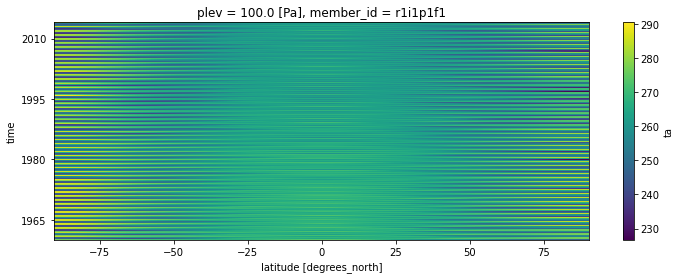

In [8]:
ta_100.plot(figsize=(12,4))
plt.show()

In [10]:
ta = ds_ta['ta'].sel(time=slice('2010-01-01', '2014-01-01')).isel(member_id=0).mean(dim='lon').compute()

In [11]:
ta_seasons = ta.groupby('time.season')

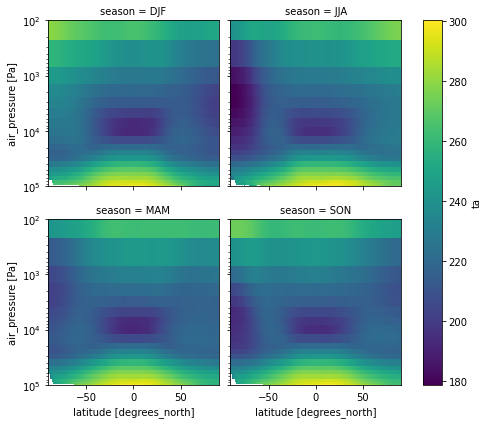

In [12]:
ta_seasons.mean(dim='time').plot(yscale='log',ylim=(1e5,100),col="season",
    col_wrap=2)